## Load libraries

In [1]:
from keras.models import  Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

## Load the data

In [2]:
(X_train,y_train),(x_test,y_test)=cifar10.load_data()

## Preprocessing

In [3]:
X_train = X_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# print(y_train[0])
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
# print(y_train[0])

## Build Architecture

In [4]:
model=Sequential()
model.add(Conv2D(8,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

## Compile

In [5]:

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

## Train

In [6]:
result = model.fit(X_train,y_train,epochs=32,batch_size=64, validation_data= (x_test,y_test))

Epoch 1/32
782/782 [==============================] - 11s 13ms/step - loss: 1.6287 - accuracy: 0.4176 - val_loss: 1.4281 - val_accuracy: 0.4867
Epoch 2/32
782/782 [==============================] - 10s 12ms/step - loss: 1.3562 - accuracy: 0.5186 - val_loss: 1.2943 - val_accuracy: 0.5382
Epoch 3/32
782/782 [==============================] - 9s 12ms/step - loss: 1.2595 - accuracy: 0.5543 - val_loss: 1.2728 - val_accuracy: 0.5469
Epoch 4/32
782/782 [==============================] - 9s 12ms/step - loss: 1.1954 - accuracy: 0.5782 - val_loss: 1.2121 - val_accuracy: 0.5729
Epoch 5/32
782/782 [==============================] - 9s 12ms/step - loss: 1.1421 - accuracy: 0.5974 - val_loss: 1.2236 - val_accuracy: 0.5665
Epoch 6/32
782/782 [==============================] - 9s 11ms/step - loss: 1.0986 - accuracy: 0.6134 - val_loss: 1.1751 - val_accuracy: 0.5797
Epoch 7/32
782/782 [==============================] - 9s 11ms/step - loss: 1.0555 - accuracy: 0.6299 - val_loss: 1.1479 - val_accuracy: 0.59

## Evaluation

In [10]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"accuracy :{accuracy}")
print(f"loss :{loss}")

313/313 [==============================] - 1s 4ms/step - loss: 1.5175 - accuracy: 0.5944
accuracy :0.5943999886512756
loss :1.5174885988235474


## Visualization

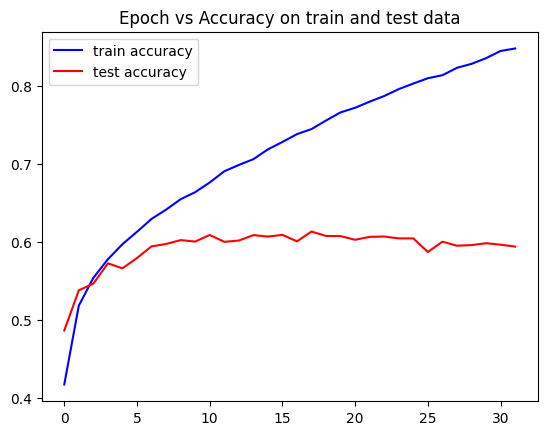

In [8]:
plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='test accuracy',color='red')
plt.legend()
plt.title("Epoch vs Accuracy on train and test data")
plt.show()

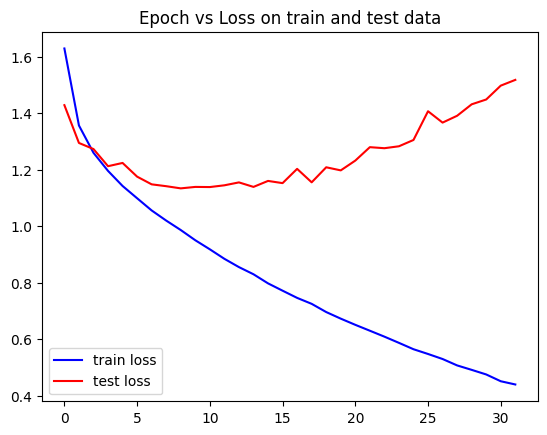

In [9]:
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='test loss',color='red')
plt.legend()
plt.title("Epoch vs Loss on train and test data")
plt.show()

Analysis : Train accuracy improved over the epochs. So, increase num of epochs from 32 to 100 